# 1.0 Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/mexico-property-sales-data-2016/properati_mx_2016_11_01_properties_sell.csv


# 1.1 Import Dataset

In [13]:
df = pd.read_csv("/kaggle/input/mexico-property-sales-data-2016/properati_mx_2016_11_01_properties_sell.csv")
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat_lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,location
0,2013-09-19,sell,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,POINT(-87.076686 20.627527),20.627527,-87.076686,269000.0,...,2445.454545,2445.454545,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o6...,Referencia #28010. En el centro de Playa del C...,Departamento en Venta. Ref. #28010. 3 Dormitor...,https://thumbs-cf.properati.com/3/q4Ws9xQT8Yu3...,POINT(-87.076686 20.627527)
1,2013-09-19,sell,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,POINT(-87.076718 20.627567),20.627567,-87.076718,230000.0,...,2090.909091,2090.909091,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o8...,Referencia #28925. En el centro de Playa del C...,Departamento en Venta. Ref. #28925. 3 Dormitor...,https://thumbs-cf.properati.com/8/7W4OI5hIXPdY...,POINT(-87.076718 20.627567)
2,2013-09-19,sell,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,POINT(-87.075866 20.6267),20.626700,-87.075866,135000.0,...,3292.682927,3292.682927,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o9...,Referencia #29031. La Papaya un proyecto altam...,Departamento en Venta. Ref. #29031. 1 Dormitor...,https://thumbs-cf.properati.com/0/4h1_ZbVNWly0...,POINT(-87.075866 20.6267)
3,2013-09-19,sell,apartment,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,POINT(-87.070345 20.635482),20.635482,-87.070345,185000.0,...,1516.393443,1516.393443,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29032. Visite las nuevas Acqua Ter...,Departamento en Venta. Ref. #29032. 2 Dormitor...,https://thumbs-cf.properati.com/0/Mxv1JulyoQBM...,POINT(-87.070345 20.635482)
4,2013-09-19,sell,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,POINT(-87.074658 20.629092),20.629092,-87.074658,180000.0,...,NaN,NaN,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ok...,Referencia #33970. Todavía tenemos algunas uni...,Departamento en Venta. Ref. #33970. Encanto Ri...,https://thumbs-cf.properati.com/9/jzkZFLJUFVEw...,POINT(-87.074658 20.629092)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150928 entries, 0 to 150927
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  150928 non-null  object 
 1   operation                   150928 non-null  object 
 2   property_type               150928 non-null  object 
 3   place_name                  150928 non-null  object 
 4   place_with_parent_names     150928 non-null  object 
 5   geonames_id                 1 non-null       float64
 6   lat_lon                     124756 non-null  object 
 7   lat                         124756 non-null  float64
 8   lon                         124756 non-null  float64
 9   price                       149386 non-null  float64
 10  currency                    149386 non-null  object 
 11  price_aprox_local_currency  149386 non-null  float64
 12  price_aprox_usd             149386 non-null  float64
 13  surface_total_

# 2.0 Data Wrangling

## 2.1 Create new column

In [15]:
# create a new column for state
df["state"] = df["place_with_parent_names"].str.split("|",expand = True)[2]
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat_lon,lat,lon,price,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,location,state
0,2013-09-19,sell,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,POINT(-87.076686 20.627527),20.627527,-87.076686,269000.0,...,2445.454545,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o6...,Referencia #28010. En el centro de Playa del C...,Departamento en Venta. Ref. #28010. 3 Dormitor...,https://thumbs-cf.properati.com/3/q4Ws9xQT8Yu3...,POINT(-87.076686 20.627527),Quintana Roo
1,2013-09-19,sell,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,POINT(-87.076718 20.627567),20.627567,-87.076718,230000.0,...,2090.909091,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o8...,Referencia #28925. En el centro de Playa del C...,Departamento en Venta. Ref. #28925. 3 Dormitor...,https://thumbs-cf.properati.com/8/7W4OI5hIXPdY...,POINT(-87.076718 20.627567),Quintana Roo
2,2013-09-19,sell,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,POINT(-87.075866 20.6267),20.626700,-87.075866,135000.0,...,3292.682927,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o9...,Referencia #29031. La Papaya un proyecto altam...,Departamento en Venta. Ref. #29031. 1 Dormitor...,https://thumbs-cf.properati.com/0/4h1_ZbVNWly0...,POINT(-87.075866 20.6267),Quintana Roo
3,2013-09-19,sell,apartment,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,POINT(-87.070345 20.635482),20.635482,-87.070345,185000.0,...,1516.393443,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29032. Visite las nuevas Acqua Ter...,Departamento en Venta. Ref. #29032. 2 Dormitor...,https://thumbs-cf.properati.com/0/Mxv1JulyoQBM...,POINT(-87.070345 20.635482),Quintana Roo
4,2013-09-19,sell,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,POINT(-87.074658 20.629092),20.629092,-87.074658,180000.0,...,NaN,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ok...,Referencia #33970. Todavía tenemos algunas uni...,Departamento en Venta. Ref. #33970. Encanto Ri...,https://thumbs-cf.properati.com/9/jzkZFLJUFVEw...,POINT(-87.074658 20.629092),Quintana Roo


### 2.2 Drop NaNs, redundant columns and columns whose values might not be useful to this project

In [16]:
# drop redundant columns and columns whose values might not be useful to this project
columns_list = ["operation",
                "place_name",
                "lat_lon",
                "price",
                "currency",
                "price_aprox_local_currency",
                "surface_total_in_m2",
                "price_per_m2",
                "properati_url",
                "description",
                "title",
                "image_thumbnail",
                "price_usd_per_m2",
                "place_with_parent_names",
                "created_on",
                "operation"
               ]
print(columns_list)
print("")
print("There are "f'{len(columns_list)}' " column names in this list")

['operation', 'place_name', 'lat_lon', 'price', 'currency', 'price_aprox_local_currency', 'surface_total_in_m2', 'price_per_m2', 'properati_url', 'description', 'title', 'image_thumbnail', 'price_usd_per_m2', 'place_with_parent_names', 'created_on', 'operation']

There are 16 column names in this list


In [17]:
def flag_columns(df):
    """
    This function compiles a list of columns having less than 30% non null values 
    compared with a column with 100% non null values
    """
    index_column = df['state'].count()
    flagged_columns = []
    for column in df.columns:
        non_null_count = df[column].count()
        percentage = non_null_count / index_column
        
        if percentage < 0.3:
            flagged_columns.append(column)
            
    return flagged_columns

In [18]:
flagged_columns = flag_columns(df)
print(flagged_columns)

['geonames_id', 'floor', 'rooms', 'expenses']


In [19]:
for column in flagged_columns:
    columns_list.append(column)
    
print("drop these " f'{len(columns_list)}' " columns")

drop these 20 columns


In [20]:
#drop columns_list
df.drop(columns = columns_list, inplace = True)

In [21]:
df.dropna(inplace = True)

In [22]:
df.head()

,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,location,state
0,apartment,20.627527,-87.076686,269000.00,110.0,POINT(-87.076686 20.627527),Quintana Roo
1,apartment,20.627567,-87.076718,230000.00,110.0,POINT(-87.076718 20.627567),Quintana Roo
2,apartment,20.626700,-87.075866,135000.00,41.0,POINT(-87.075866 20.6267),Quintana Roo
3,apartment,20.635482,-87.070345,185000.00,122.0,POINT(-87.070345 20.635482),Quintana Roo
5,apartment,20.621580,-87.092398,85655.92,127.0,POINT(-87.092398 20.62158),Quintana Roo


# 3.0 Exploratory Data analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118690 entries, 0 to 150927
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   property_type          118690 non-null  object 
 1   lat                    118690 non-null  float64
 2   lon                    118690 non-null  float64
 3   price_aprox_usd        118690 non-null  float64
 4   surface_covered_in_m2  118690 non-null  float64
 5   location               118690 non-null  object 
 6   state                  118690 non-null  object 
dtypes: float64(4), object(3)
memory usage: 7.2+ MB


While there are only two dtypes in our DataFrame (object and float64), there are three categories of data: **location**, **categorical**, and **numeric**. Each of these require a different kind of exploration in our analysis.

# 3.1 Location Data: `"lat"` and `"lon

In [38]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},# Map will be centered on Mexico City
    width=800,  # Width of map
    height=800,  # Height of map
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

Looking at this map, we can see the properties in our dataset distributed throughout the country, some states more densely distributed than others.

# 3.2 Categorical Data

## 3.2.1 Categorical Data: `"property type"`

In [25]:
df["property_type"].value_counts()

property_type
house        85744
apartment    30160
store         2785
PH               1
Name: count, dtype: int64

There are three major property types in this dataset namely:
    1. house
    2. apartment
    3. store
**PH** has to be some mistake, so I'll exclude it out from this dataframe.

In [26]:
# exclude PH as property type
Mask_property_type = ~(df["property_type"] == 'PH')
df = df[Mask_property_type]

In [27]:
most_property_type = df["property_type"].value_counts()
most_property_type

property_type
house        85744
apartment    30160
store         2785
Name: count, dtype: int64

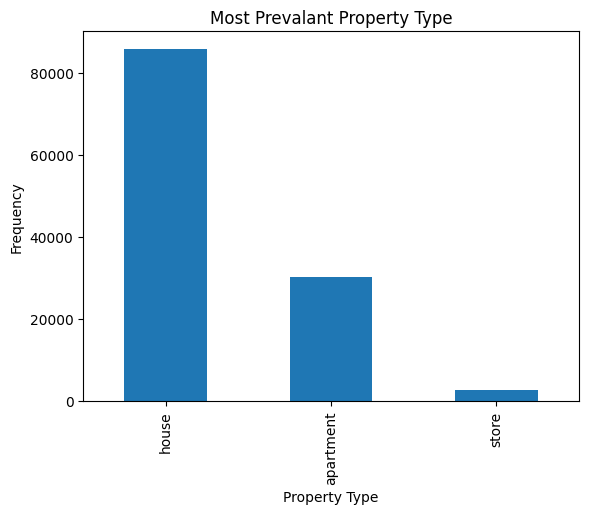

In [28]:
most_property_type.plot(
    kind = "bar",
    xlabel = "Property Type",
    ylabel = "Frequency",
    title = "Most Prevalant Property Type"
);

## 3.2.2 Categorical Data: `"state"`

In [29]:
# Get value counts of "state" column
df["state"].value_counts().head(10)

state
Distrito Federal                   19858
Estado de México                   13419
Yucatán                             9787
Morelos                             9218
Nuevo León                          8218
Querétaro                           7550
Veracruz de Ignacio de la Llave     7257
Puebla                              5651
Jalisco                             4603
Quintana Roo                        4397
Name: count, dtype: int64

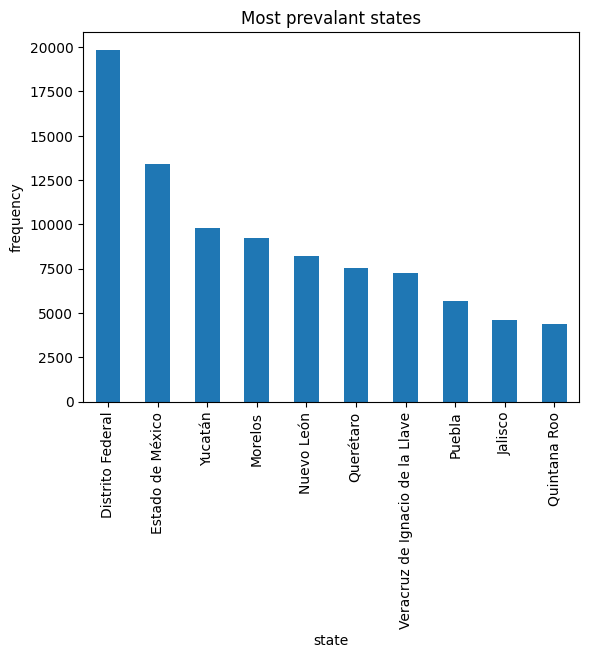

In [30]:
df["state"].value_counts().head(10).plot(
    kind = 'bar',
    xlabel = 'state',
    ylabel = 'frequency',
    title = 'Most prevalant states',
);

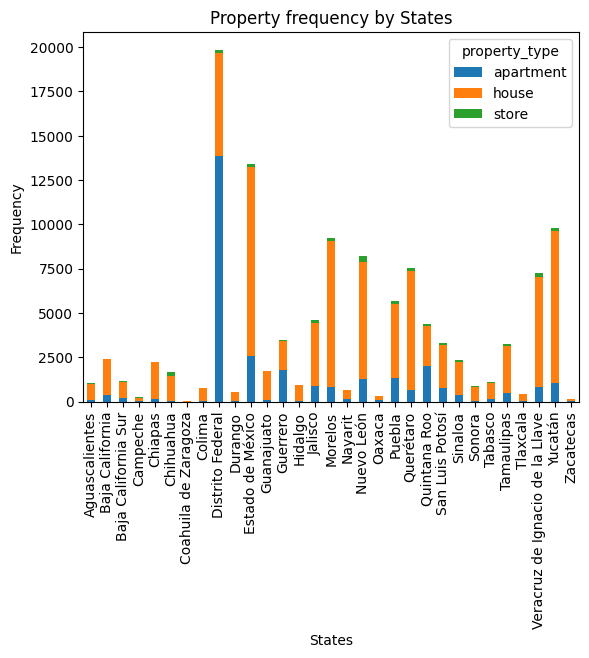

In [31]:
df.groupby(["state","property_type"]).size().unstack().plot(
    kind = "bar",
    stacked = True,
    xlabel = 'States',
    ylabel = 'Frequency',
    title = 'Property frequency by States'
);

# 3.3 Numerical Data: `"surface_covered_in_m2"` and `"price_aprox_usd"`

In [32]:
df[["surface_covered_in_m2", "price_aprox_usd"]].describe()

,surface_covered_in_m2,price_aprox_usd
count,1.186890e+05,1.186890e+05
mean,2.849796e+03,2.067169e+05
std,6.953376e+05,4.562030e+05
min,-3.240000e+02,5.005210e+03
25%,8.500000e+01,5.795513e+04
50%,1.600000e+02,1.106416e+05
75%,2.720000e+02,2.107959e+05
max,2.303030e+08,4.978873e+07


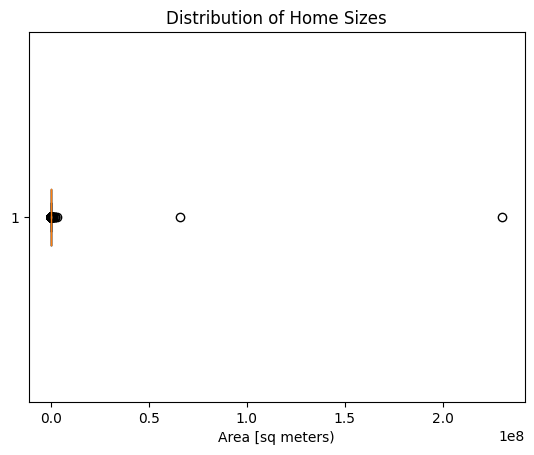

In [33]:
# Use Matplotlib to create boxplot of "area_m2"
plt.boxplot(df ["surface_covered_in_m2"], vert=False)

# Add x-axis label
plt.xlabel("Area [sq meters)")

# Add title
plt.title("Distribution of Home Sizes");

The boxplot reveals the data is pulled between some really large and unrealistic extremes between the least and the maximum values. To deal with this problem i'll clip the data between its quantiles

In [34]:
low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
mask_area = df["surface_covered_in_m2"].between(low, high)

In [35]:
df = df[mask_area]

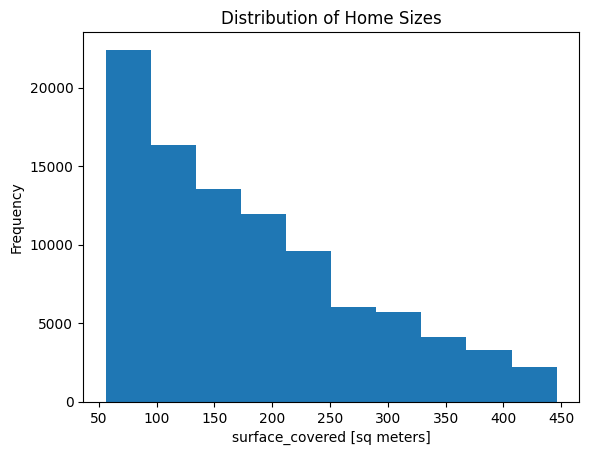

In [36]:
# Use Matplotlib to create histogram of "surface_covered_in_m2"
plt.hist(df['surface_covered_in_m2'])
# Add x-axis label
plt.xlabel('surface_covered [sq meters]')
# Add y-axis label
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Sizes");

Looking at the histogram, it is visible that `"surface_covered_in_m2"` skews right. In other words, there are more properties at the lower end of the distribution (50–200m<sup>2</sup>) than at the higher end (250–400m<sup>2</sup>). That explains the difference between the mean and the median.

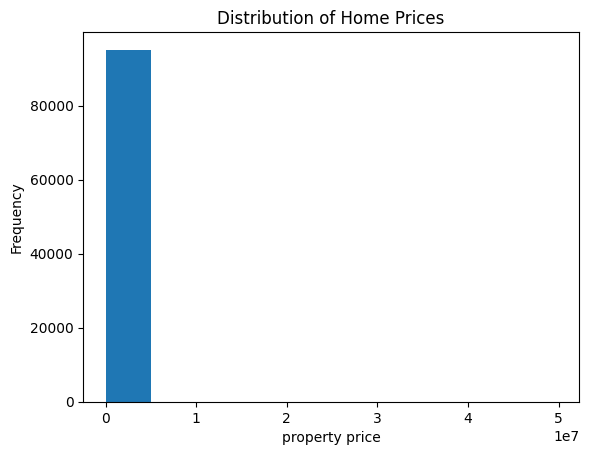

In [37]:
# Use Matplotlib to create histogram of "price_aprox_usd"
plt.hist(df['price_aprox_usd'])
# Add x-axis label
plt.xlabel('property price')
# Add y-axis label
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Prices");

It is visible that despite clipping extreme sizes in the dataset, it still had little effect on the outliers in property prices. Could further exploration by treating each property type i.e **house, apartment and store** seperately give better meaning to the data? or does treating **highly priced properties** seperately from **low price properties** work better?